In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
lgd_multipliers = [1.36, 1.41, 1.43, 1.39, 1.46, 1.33, 1.47, 1.47, 1.32, 1.29]

In [27]:
lgd_df = pd.read_csv("data/LGD.csv", index_col=0)
stressed_lgd_df = lgd_df.copy()

for i in range(1, 11):
    stressed_lgd_df[f"Year {i}"] = lgd_df[f"Year {i}"] * lgd_multipliers[i - 1]

stressed_lgd_df = stressed_lgd_df.apply(lambda lgd: lgd.clip(upper=1.0), axis=1)
stressed_lgd_df

,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,,
1,0.649557,1.000000,0.389954,0.202316,0.982741,1.000000,1.000000,0.713938,0.170562,0.657701
2,0.539241,1.000000,1.000000,1.000000,1.000000,0.550986,0.527881,0.478058,0.588458,1.000000
3,0.431827,0.524315,0.245777,0.824884,0.918518,0.337979,1.000000,0.719232,0.870040,1.000000
4,1.000000,0.509354,0.705120,1.000000,0.219917,0.785690,0.463619,0.447937,0.420839,0.206345
5,0.683551,0.406504,1.000000,1.000000,0.746158,0.652231,0.180056,0.572628,0.297245,0.838764
...,...,...,...,...,...,...,...,...,...,...
1996,0.601606,0.733599,0.771636,0.477776,1.000000,0.195186,1.000000,0.898992,0.614633,0.137001
1997,0.917217,0.936586,0.481691,0.216703,0.962254,1.000000,0.337286,0.641639,0.805536,0.656032
1998,0.804754,0.424860,0.492408,1.000000,0.857505,1.000000,0.690966,0.705641,0.659629,0.870841


In [28]:
pd_df = pd.read_csv("results/probability_of_default.csv", index_col=0)
ead_multiplier_df = pd.read_csv("data/EAD.csv", index_col=0)
amount_df = pd.read_csv("data/Amount.csv", index_col=0)

ead_df = amount_df * ead_multiplier_df
ead_df

,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,,
1,12.810614,34.770512,28.718416,40.408848,23.316523,10.009906,12.922705,37.298318,47.674596,16.865315
2,5.282260,24.560620,3.154042,33.229493,10.717220,20.158502,3.862200,39.439464,41.695822,44.597097
3,16.637706,4.924824,41.839875,22.633789,16.511762,6.858320,56.214754,12.806135,35.340573,3.779069
4,2.076288,35.098718,15.148340,23.206436,35.030467,26.938684,44.093305,20.070455,10.725917,23.815188
5,16.037031,22.651730,4.717183,25.176720,15.247376,15.916207,25.931473,2.130878,19.531495,4.432807
...,...,...,...,...,...,...,...,...,...,...
1996,21.413156,23.173165,35.898508,16.101259,23.107668,16.022663,19.673962,11.045350,19.882677,20.676768
1997,26.602382,14.325095,21.700151,30.335485,29.732503,25.909430,24.265779,23.248249,17.657489,5.880102
1998,8.264673,34.784682,50.566567,25.274536,34.774062,11.620097,9.302535,11.835778,14.954926,28.543100


In [29]:
stress_test_1_el_df = pd.DataFrame()
for year in range(2, 11):
    stress_test_1_el_df[f"Year {year}"] = (
        pd_df[f"Year {year}"] * stressed_lgd_df[f"Year {year}"] * ead_df[f"Year {year}"]
    )

stress_test_1_el_df

,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,
1,3.610784,1.490169,1.195604,2.138650,0.889769,1.402464,3.314774,1.102572,1.232482
2,3.169112,0.435040,4.291632,1.166794,1.542646,0.178977,2.471545,3.463941,6.276628
3,0.264385,1.430379,2.411286,2.166623,0.266137,7.567371,1.146545,3.679212,0.324384
4,1.856527,1.538845,2.949971,0.872697,2.125401,2.751873,1.087535,0.486110,0.691620
5,0.833933,0.377375,3.200431,1.545548,1.441812,0.633102,0.159951,0.645071,0.413120
...,...,...,...,...,...,...,...,...,...
1996,2.632715,3.853086,0.993534,2.617666,0.411501,2.667656,1.277262,1.316059,0.243153
1997,1.380318,1.605106,0.712821,3.241002,3.409135,0.888241,1.804473,1.928643,0.514338
1998,1.906920,3.463448,2.115490,3.544053,1.032897,0.697584,1.039644,1.337586,3.314199


In [30]:
stress_test_1_el_df.to_csv("results/stress_test_1_expected_loss.csv")

In [31]:
rating_changes = {
    "AAA": "A",
    "AA": "A",
    "A": "BBB",
    "BBB": "BB",
    "BB": "B",
    "B": "C",
    "C": "D",
    "D": "D",
}

In [32]:
ratings_df = pd.read_csv("data/Ratings.csv", index_col=0)
stressed_ratings_df = ratings_df.copy()

stressed_ratings_df["Year 10"] = stressed_ratings_df["Year 9"].map(rating_changes)
stressed_ratings_df

,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,,
1,AAA,BBB,BBB,B,A,BBB,BBB,D,A,BBB
2,A,BB,B,AA,AAA,C,B,AAA,AAA,A
3,BB,AA,BB,AA,BB,BB,C,D,BBB,BB
4,BBB,BBB,AA,A,B,D,C,C,AA,A
5,D,A,AAA,A,C,C,AA,AAA,B,C
...,...,...,...,...,...,...,...,...,...,...
1996,D,C,BB,AA,B,AAA,AA,BB,AA,A
1997,BBB,AAA,A,C,B,AAA,BBB,C,A,BBB
1998,C,BB,BB,BB,D,BBB,BBB,D,A,BBB


In [33]:
transition_matrices: list[pd.DataFrame] = []
for year in range(9):
    transition_matrices.append(
        pd.read_csv(f"results/transition_matrix_{year+1}_to_{year+2}.csv", index_col=0)
    )

transition_matrices

[          AAA        AA         A       BBB        BB         B         C  \
 AAA  0.115226  0.127572  0.119342  0.119342  0.160494  0.123457  0.131687   
 AA   0.116041  0.095563  0.187713  0.126280  0.119454  0.146758  0.105802   
 A    0.132075  0.135849  0.124528  0.135849  0.162264  0.120755  0.098113   
 BBB  0.150000  0.107692  0.138462  0.111538  0.107692  0.138462  0.142308   
 BB   0.120968  0.100806  0.096774  0.112903  0.137097  0.125000  0.177419   
 B    0.126697  0.122172  0.117647  0.108597  0.122172  0.149321  0.108597   
 C    0.115044  0.123894  0.123894  0.123894  0.128319  0.119469  0.110619   
 D    0.122951  0.135246  0.147541  0.151639  0.127049  0.118852  0.094262   
 
             D  
 AAA  0.102881  
 AA   0.102389  
 A    0.090566  
 BBB  0.103846  
 BB   0.129032  
 B    0.144796  
 C    0.154867  
 D    0.102459  ,
           AAA        AA         A       BBB        BB         B         C  \
 AAA  0.132000  0.148000  0.100000  0.116000  0.120000  0.156000

In [34]:
default_probabilities = [
    transition_matrix["D"] for transition_matrix in transition_matrices
]
stressed_pd_df = pd.DataFrame()

for year in range(2, 11):
    stressed_pd_df[f"Year {year}"] = stressed_ratings_df[f"Year {year}"].map(
        default_probabilities[year - 2]
    )
stressed_pd_df

,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,
1,0.103846,0.133065,0.146245,0.093333,0.088889,0.108527,0.124481,0.135593,0.111111
2,0.129032,0.137931,0.129151,0.108871,0.138889,0.087786,0.131086,0.141176,0.085837
3,0.102389,0.139098,0.129151,0.142857,0.114815,0.134615,0.124481,0.119658,0.117409
4,0.103846,0.144068,0.127119,0.113281,0.100418,0.134615,0.120968,0.107692,0.085837
5,0.090566,0.080000,0.127119,0.135849,0.138889,0.135593,0.131086,0.111111,0.123016
...,...,...,...,...,...,...,...,...,...
1996,0.154867,0.139098,0.129151,0.113281,0.131579,0.135593,0.128631,0.107692,0.085837
1997,0.102881,0.153558,0.108434,0.113281,0.131579,0.108527,0.120968,0.135593,0.111111
1998,0.129032,0.139098,0.083700,0.118852,0.088889,0.108527,0.124481,0.135593,0.111111


In [35]:
stress_test_2_el_df = pd.DataFrame()
for year in range(2, 11):
    stress_test_2_el_df[f"Year {year}"] = (
        stressed_pd_df[f"Year {year}"] * lgd_df[f"Year {year}"] * ead_df[f"Year {year}"]
    )

stress_test_2_el_df

,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,
1,2.797486,1.042076,0.860147,1.464829,0.719236,0.995237,2.254948,0.835282,0.955412
2,2.305359,0.351010,3.612446,1.014476,1.159884,0.121753,1.681323,2.624198,3.315218
3,0.187507,1.000265,1.734738,1.483988,0.200103,5.556143,0.779963,2.787282,0.353705
4,1.316686,1.076115,2.260664,0.597738,1.598046,1.872022,0.739820,0.368265,0.326988
5,0.591442,0.302122,2.848032,1.058594,1.084069,0.430682,0.108810,0.488690,0.354560
...,...,...,...,...,...,...,...,...,...
1996,1.867174,2.694466,0.714773,2.145533,0.309399,2.060609,0.868886,0.997014,0.188491
1997,0.978949,1.122452,0.512821,2.219864,2.871920,0.604246,1.227532,1.461093,0.332260
1998,1.352425,2.421991,1.735739,2.427433,0.857748,0.474547,0.707241,1.013323,2.140955


In [36]:
stress_test_2_el_df.to_csv("results/stress_test_2_expected_loss.csv")

In [37]:
el_df = pd.read_csv("results/expected_loss.csv", index_col=0)

In [38]:
print("Total Expected Loss Year 10: ", el_df["Year 10"].sum())
print(
    "Total Stress Test 1 Expected Loss Year 10: ", stress_test_1_el_df["Year 10"].sum()
)
print(
    "Total Stress Test 2 Expected Loss Year 10: ", stress_test_2_el_df["Year 10"].sum()
)

Total Expected Loss Year 10:  2682.310321709403
Total Stress Test 1 Expected Loss Year 10:  3387.377531524671
Total Stress Test 2 Expected Loss Year 10:  2519.5649790652874


In [39]:
losses = {"actual":[], "stress_test_1":[]}

In [40]:
for year in range(2, 11):
    losses["actual"].append(el_df[f"Year {year}"].sum())
    losses["stress_test_1"].append(stress_test_1_el_df[f"Year {year}"].sum())
    print(f"Total Expected Loss Year {year}: ", el_df[f"Year {year}"].sum())
    print(
        f"Total Stress Test 1 Expected Loss Year {year}: ",
        stress_test_1_el_df[f"Year {year}"].sum(),
    )

Total Expected Loss Year 2:  2658.0569654962774
Total Stress Test 1 Expected Loss Year 2:  3589.9352038069064
Total Expected Loss Year 3:  3109.281502731012
Total Stress Test 1 Expected Loss Year 3:  4220.280463182567
Total Expected Loss Year 4:  2758.958214684034
Total Stress Test 1 Expected Loss Year 4:  3666.9767316810285
Total Expected Loss Year 5:  2799.959400363592
Total Stress Test 1 Expected Loss Year 5:  3855.863301500918
Total Expected Loss Year 6:  2614.8466960460864
Total Stress Test 1 Expected Loss Year 6:  3374.327240907704
Total Expected Loss Year 7:  2881.5891626182456
Total Stress Test 1 Expected Loss Year 7:  3966.2679469254554
Total Expected Loss Year 8:  2852.074226845445
Total Stress Test 1 Expected Loss Year 8:  3930.8671564559577
Total Expected Loss Year 9:  2833.8902919266743
Total Stress Test 1 Expected Loss Year 9:  3647.4767542575805
Total Expected Loss Year 10:  2682.310321709403
Total Stress Test 1 Expected Loss Year 10:  3387.377531524671


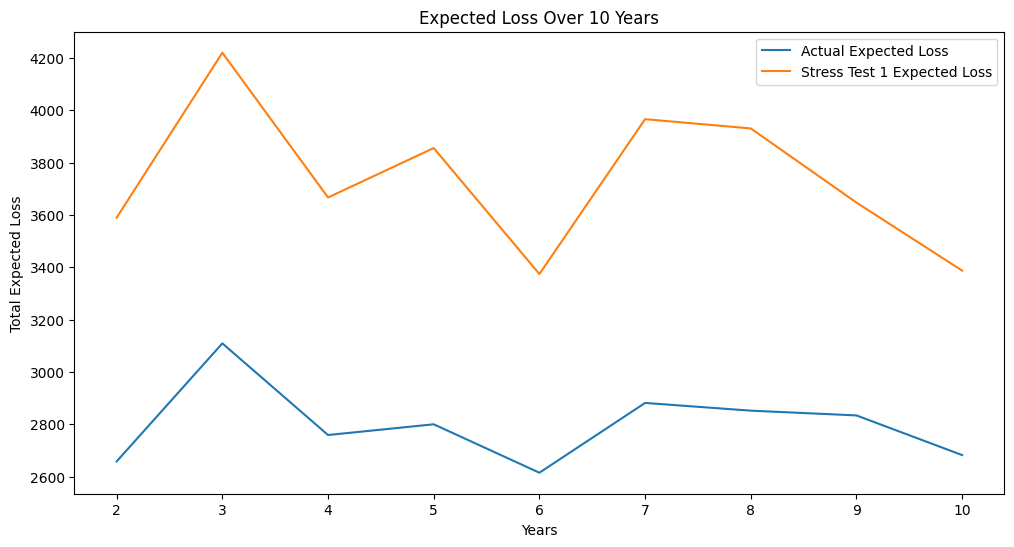

In [41]:
#line charts for losses
years = list(range(2, 11))
plt.figure(figsize=(12, 6))
plt.plot(years, losses["actual"], label="Actual Expected Loss")
plt.plot(years, losses["stress_test_1"], label="Stress Test 1 Expected Loss")
plt.xlabel("Years")
plt.ylabel("Total Expected Loss")
plt.title("Expected Loss Over 10 Years")
plt.legend()
plt.show()